# Ultimate Data Challenge

# Part 1: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


#Aggregate login counts based on 15-min time intervals

In [4]:
logins.index = logins.login_time
logins.columns = ['number of logins']
quarter = logins.resample("15min").count()
quarter.head()

,number of logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [5]:
daily = logins.resample("D").count()
monthly = logins.resample("M").count()

In [6]:
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%d")

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


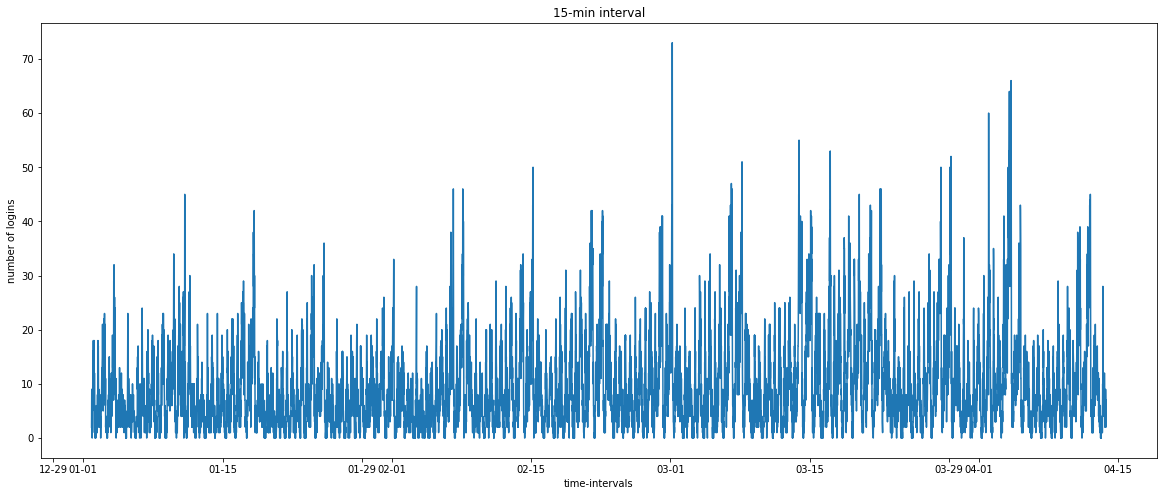

In [7]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(quarter)
ax.set(title = "15-min interval",xlabel = "time-intervals",ylabel="number of logins")
ax.xaxis.set_major_formatter(date_format)

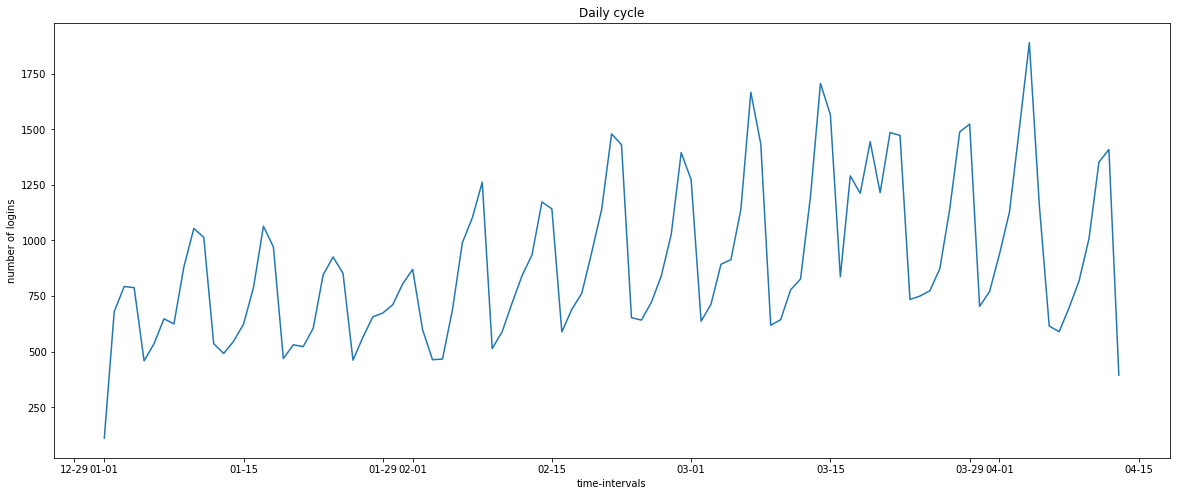

In [8]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(daily)
ax.set(title = "Daily cycle",xlabel = "time-intervals",ylabel="number of logins")
ax.xaxis.set_major_formatter(date_format)

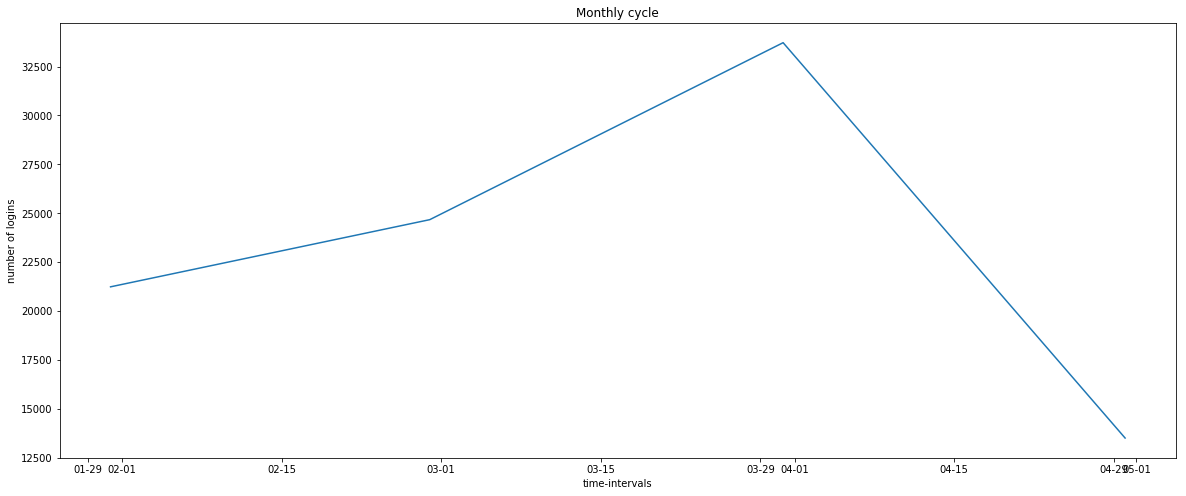

In [9]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(monthly)
ax.set(title = "Monthly cycle",xlabel = "time-intervals",ylabel="number of logins")
ax.xaxis.set_major_formatter(date_format)

In [10]:
logins_df = quarter.reset_index()
logins_df['day'] = logins_df["login_time"].dt.day_name()

In [11]:
logins_df.head()

,login_time,number of logins,day
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [12]:
logins_day = logins_df.groupby("day").sum()
logins_day.head()

,number of logins
day,
Friday,15208
Monday,8823
Saturday,19377
Sunday,18167
Thursday,11960


[Text(0, 0.5, 'number of logins'),
 Text(0.5, 0, 'days in a week'),
 Text(0.5, 1.0, 'Day cycle')]

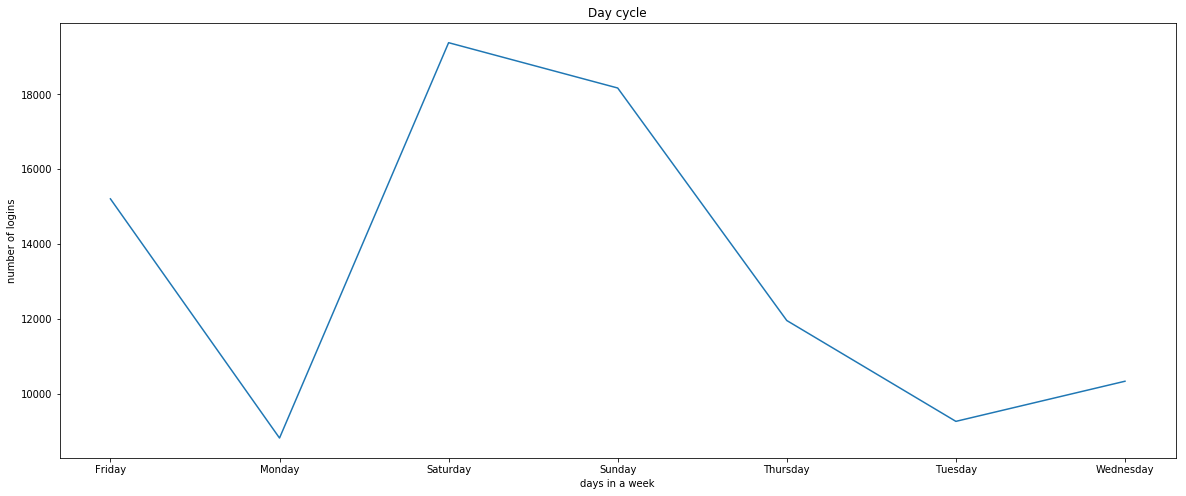

In [13]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(logins_day)
ax.set(title = "Day cycle",xlabel = "days in a week",ylabel="number of logins")
#ax.xaxis.set_major_formatter(date_format)

The charts above show that weekends are the busiest and April month had the highest peak compared to other months.

# Part 2 ‑ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment 

b. what statistical test(s) you will conduct to verify the significance of the observation 

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

We can use some of the below characterstics as a basis for comparison, which can be obtained from their database - before and after the reimbursement program.

Daily average wait times,average rate of service being cancelled due to distance/any particular reason,average cost during peak hours in either of the cities both before and after the change.

Then we can perform hypothesis testing on each of the those metrics above. Using the first item, average wait times, as an example, the null hypothesis would be that the difference between the two means will be zero. 

From there, we can simulate the assumption of our null hypothesis by shuffling the labels of our means (half of the sample is randomly assigned as have occurred with reimbursement). Let's say that the target for the average wait time is a 10-second improvement -- our observed test statistic. The p-value is then the probability that a user waited 10-seconds less than when there was no reimbursement in these randomized circumstances. If this event happens less frequently than 5% of the time, then we know it's unlikely to occur. And so encountering a difference of 10-seconds waiting time is considered to be statistically significant.

If we disprove the null hypothesis for all the above metrics, then we have proven that the reimbursement program works.

# Part 3 ‑ Predictive modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [14]:
import pandas as pd
import json

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])
df["signup_date"] = pd.to_datetime(df["signup_date"])
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


A user is considered active if he took a trip in the last 30 days.

In [17]:
print(max(df.last_trip_date))

2014-07-01 00:00:00


In [16]:
df['active'] = df['last_trip_date'].apply(lambda x : 1 if str(x) >= '2014-06-01' else 0)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


[Text(0, 0, 'Inactive'), Text(0, 0, 'Active')]

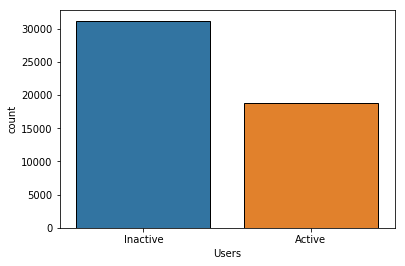

In [19]:
label = {0:'Inactive',1:'Active'}
ax = sns.countplot(x='active',data=df,edgecolor='black')
ax.set(xlabel='Users')
ax.set_xticklabels(label.values())

There are more number of inactive users compared to the active users.

In [17]:
retained = (len(df[df.active==1])/len(df))*100
print("Total number of users retained are: %.2f%%" %retained)

Total number of users retained are: 37.61%


Prediction whether a user will be active in their 6th month or not.

In [21]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [18]:
df_new = df.drop(columns=['last_trip_date','signup_date'])
df_new.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


In [20]:
df_new.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
phone                      396
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
active                       0
dtype: int64

In [21]:
df_new.avg_rating_by_driver.fillna(df_new.avg_rating_by_driver.mean(),inplace=True)
df_new.avg_rating_of_driver.fillna(df_new.avg_rating_by_driver.mean(),inplace=True)

In [22]:
df_new.phone = df_new.phone.apply(lambda x : 'Other' if type(x)!= str else x)

In [23]:
print(df_new["phone"].unique())

['iPhone' 'Android' 'Other']


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [25]:
X = df_new.drop('active',axis=1)
y = df_new['active']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4


In [28]:
#sklearn documentation for columntransformer example

numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", \
                    "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

#pipeline for categorical features
categorical_features =  ["city", "phone", "ultimate_black_user"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

param_grid = {"classifier__n_estimators" : [75, 100, 150],
          "classifier__max_depth" : [5, 10, 15]}


grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                        

In [29]:
y_pred = grid_search.predict(X_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Training accuracy score from tuned model: {grid_search.best_score_*100:.1f}%")


Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 150}
Training accuracy score from tuned model: 78.4%


In [30]:
from sklearn import metrics

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)

print(f"Model accuracy: {test_accuracy*100:.2f}%")
print(f"Model F1 Score: {test_f1_score:.2f}")

Model accuracy: 78.26%
Model F1 Score: 0.69


In [43]:
pipeline.fit(X_train, y_train)
fe = pipeline.named_steps['classifier']
features=X_train.columns


for idx, val in enumerate(fe.feature_importances_):
    try:
        print("{:20}{:30f}".format(features[idx], val))
    except IndexError:
            continue

avg_dist                                  0.294266
avg_rating_by_driver                      0.120450
avg_rating_of_driver                      0.080702
avg_surge                                 0.079241
city                                      0.055951
phone                                     0.084600
surge_pct                                 0.135061
trips_in_first_30_days                      0.016654
ultimate_black_user                       0.050833
weekday_pct                               0.009617


# Question 3


Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

As we identified in the model, the average distance and the weekday percent are the best predictors of a driver being active in 6th month. Hence, I recommend Ultimate to encourage riders through discounted pricing for long distance travels and weekday travels. Thus, Ultimate will be able to improve its long-term rider retention.